In [79]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot(df, filename, year):
   fig, ax = plt.subplots(figsize=(20,10))
   ax2 = ax.twinx()
   df.plot(x='week',y='aantal',ax=ax, kind='bar', legend=None, color='b')
   df.plot(x='week2',y='cumulatief',ax=ax2, color='r', linewidth=6, legend=None)
   ax2.grid()
   ax.set_xlabel("Week van het jaar", fontsize=24, labelpad=20)
   ax.set_ylabel("Aantal per week", fontsize=24, color='b', labelpad=10)
   ax2.set_ylabel("Cumulatief aantal", fontsize=24, color='r', labelpad=10)
   ax.tick_params(labelsize=20, color='b',axis='y', labelcolor='b')
   ax2.tick_params(labelsize=20, color='b',axis='y', labelcolor='r')
   ax.tick_params(labelsize=20, color='k',axis='x', labelcolor='k')
   ax.set_xlim([-1,df['week'].max()])
   ax.set_title("Vluchtelingen "+str(year), fontsize=30, pad=20)
   fig.tight_layout()
   fig.savefig(filename)

def get_df(url):
   html_doc = urllib.request.urlopen(url)
   soup = BeautifulSoup(html_doc, 'html.parser')

   divs = soup.findAll("a", {"class": "news"})
   weeks = [int(i.findAll('h3')[0].text.strip().split(' ')[4]) for i in divs]
   numbers = [float(i.findAll('h3')[0].text.strip().split(' ')[-1]) for i in divs]

   df = pd.DataFrame(np.array([weeks, numbers]).T, columns=['Week','Aantal']).sort_values('Week')
   df['week']=df['Week'].apply(lambda x: int(x))
   df['week2']=df['Week']-1
   df['Cumulatief']= df['Aantal'].cumsum()
   return df

url2019 = 'https://www.rijksoverheid.nl/documenten/publicaties/2019/01/14/de-asielinstroom-per-week-2019'
url2020 = 'https://www.rijksoverheid.nl/documenten/publicaties/2020/01/06/de-asielinstroom-per-week-2020'
df2019 = get_df(url2019)
df2020 = get_df(url2020)


In [80]:
df2019['Jaar']=2019
df2020['Jaar']=2020


In [89]:
dftotal = pd.concat([df2019, df2020])

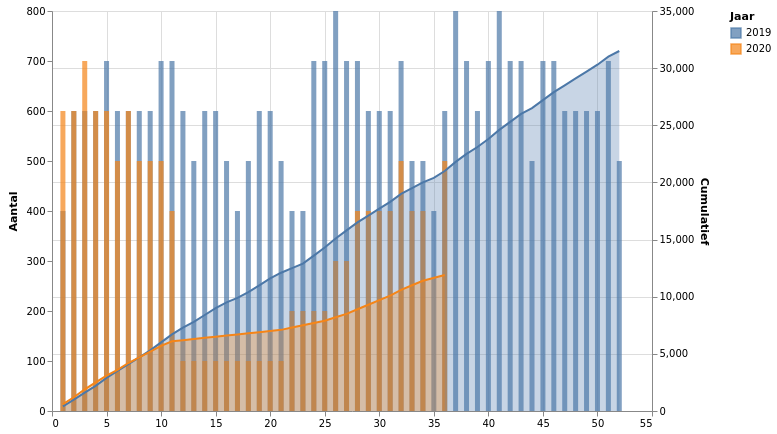

In [96]:
import altair as alt
alt.renderers.enable('notebook')

base = alt.Chart(dftotal).encode(
        alt.X('week:Q', axis=alt.Axis(title=None))
).properties(
    width=600,
    height=400
)

                 
bar = base.mark_bar(opacity=0.7).encode(
    alt.Y('Aantal', axis=alt.Axis(grid=False)),
    color='Jaar:N',
)
area =  base.mark_area(opacity=0.3).encode(
    alt.Y('Cumulatief:Q'),
    color='Jaar:N'
)
line1 =  base.mark_line(color='k').encode(
    alt.Y('Cumulatief:Q'),
    color='Jaar:N'
)

chart = alt.layer(bar, area+line1).resolve_scale(
    y = 'independent'
)

chart
# chart+line

In [92]:
import altair
print(altair.__version__)


4.2.0.dev0
